In [2]:
import pandas as pd
df = pd.read_csv("helpdesk.csv", parse_dates=["CompleteTimestamp"])
df.head()

,CaseID,ActivityID,CompleteTimestamp
0,2,1,2012-04-03 16:55:38
1,2,8,2012-04-03 16:55:53
2,2,6,2012-04-05 17:15:52
3,3,1,2010-10-29 18:14:06
4,3,8,2010-11-04 01:16:11


In [3]:
# Group by CaseID and get first and last timestamps
case_times = df.groupby("CaseID")["CompleteTimestamp"].agg(["min", "max"])
case_times["resolution_hours"] = (case_times["max"] - case_times["min"]).dt.total_seconds() / 3600
case_times.head()

,min,max,resolution_hours
CaseID,,,
2,2012-04-03 16:55:38,2012-04-05 17:15:52,48.337222
3,2010-10-29 18:14:06,2010-11-04 01:21:17,127.119722
4,2010-12-15 23:31:53,2010-12-16 17:08:19,17.607222
5,2012-04-03 21:08:32,2012-04-04 00:07:28,2.982222
6,2011-10-25 23:13:58,2011-10-26 17:54:46,18.680000


In [4]:
case_times["sla_met"] = case_times["resolution_hours"] <= 24

SLA compliance rate: 33.89%


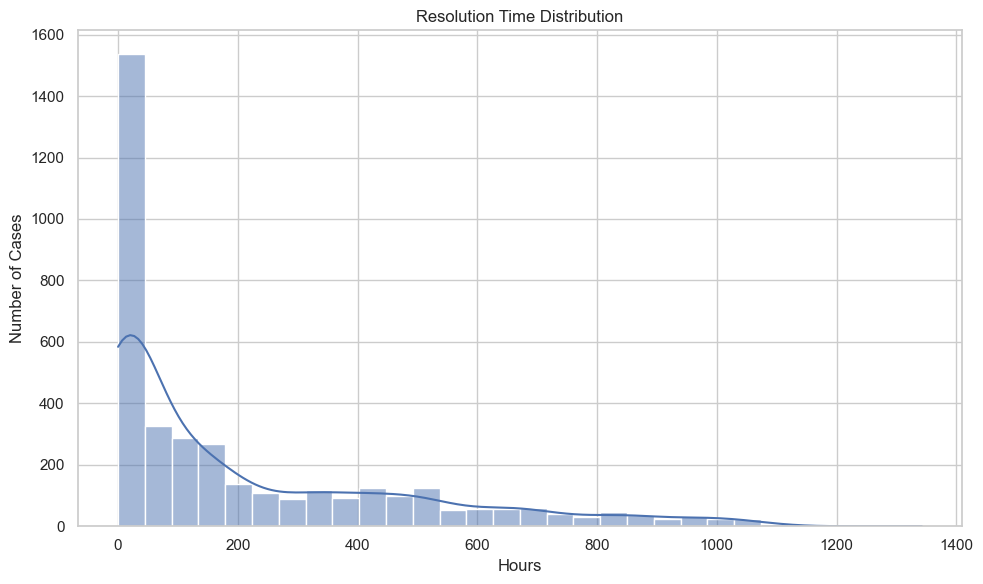

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Distribution of resolution times
plt.figure(figsize=(10,6))
sns.histplot(case_times["resolution_hours"], bins=30, kde=True)
plt.title("Resolution Time Distribution")
plt.xlabel("Hours")
plt.ylabel("Number of Cases")
plt.tight_layout()
plt.savefig("../visuals/resolution_distribution.png")

# SLA compliance rate
sla_rate = case_times["sla_met"].mean() * 100
print(f"SLA compliance rate: {sla_rate:.2f}%")

In [6]:
case_times.to_csv("../data/helpdesk_resolution_summary.csv")

OSError: Cannot save file into a non-existent directory: '..\data'

In [8]:
%matplotlib inline

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  # 👈 This is important!

# Load your data
df = pd.read_csv("helpdesk.csv", parse_dates=["CompleteTimestamp"])

# Calculate resolution time per case
case_times = df.groupby("CaseID")["CompleteTimestamp"].agg(["min", "max"])
case_times["resolution_hours"] = (case_times["max"] - case_times["min"]).dt.total_seconds() / 3600

# Plot resolution time distribution
plt.figure(figsize=(10,6))
sns.histplot(case_times["resolution_hours"], bins=30, kde=True)
plt.title("Resolution Time Distribution")
plt.xlabel("Hours")
plt.ylabel("Number of Cases")
plt.show()  # 👈 This ensures the chart is displayed

UsageError: unrecognized arguments: # 👈 This is important!
